### 数据读取与展示

In [2]:
# 使用tf.keras搭建分类模型
#导入必要的库即版本

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
#import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd,sklearn,tf,keras:
    print(module.__name__, module.__version__)

1.14.0
sys.version_info(major=3, minor=7, micro=0, releaselevel='final', serial=0)
matplotlib 2.2.3
numpy 1.16.4
pandas 0.23.4
sklearn 0.19.2
tensorflow 1.14.0
tensorflow.python.keras.api._v1.keras 2.2.4-tf


In [7]:
#导入数据集并拆分数据集
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_train.shape, y_valid.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

4423680/4422102 [==============================] - 4s 1us/step
(55000, 28, 28) (5000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


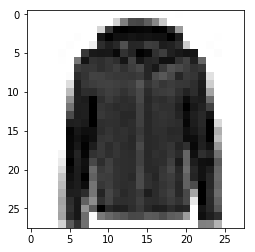

In [8]:
# 展示图像,输入为numpy数组
def show_single_image(img_arr):
    # cmap参数定义颜色图谱，默认为RGB，这里为黑白图片，用二进制显示
    plt.imshow(img_arr, cmap='binary')
    plt.show()
    
show_single_image(x_train[0])

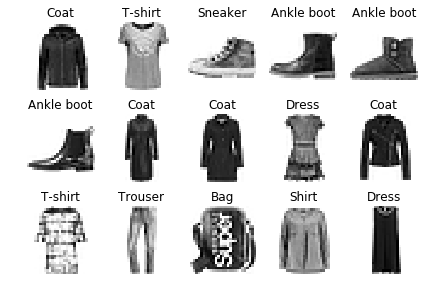

In [9]:
# 显示多张图片，多行多列
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    # 做一些验证，x样本和y样本相等
    assert len(x_data) == len(y_data)
    # 行列数小于图片总数
    assert n_rows * n_cols < len(x_data)
    # 定义一张大图
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            # 计算当前图片索引
            index = n_cols * row + col
            # 画子图
            plt.subplot(n_rows, n_cols, index+1)
            # interpolation缩放图片时的插值方法，这里选择最近邻方法作为像素点插值的值
            plt.imshow(x_data[index], cmap='binary',
                      interpolation='nearest')
            # 关掉坐标系
            plt.axis('off')
            # 配置title
            plt.title(class_names[y_data[index]])
    plt.show()
    
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
              'Coat', 'Sandal', 'Shirt', 'Sneaker',
              'Bag', 'Ankle boot']
show_imgs(3,5,x_train,y_train,class_names)

### 模型构建
不同版本API，代码不尽相同

In [18]:
# 使用tf.keras.model.Sequential()构建模型

# 创建Sequential对象
model = keras.models.Sequential()
# 添加输入层,将输入图片展平，将28X28的矩阵展开为一维向量
model.add(keras.layers.Flatten(input_shape=[28, 28]))
# 添加全连接层，神经元设为300，激活函数为‘relu’
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
# 添加输出，长度为10的向量，激活函数为'softmax'
model.add(keras.layers.Dense(10, activation='softmax'))

# 另外一种写法
#model = keras.models.Sequential([
#    keras.layers.Flatten(input_shape=[28,28]),
#    keras.layers.Dense(300, activation='relu'),
#    keras.layers.Dense(100, activation='relu'),
#    keras.layers.Dense(10, activation='softmax')
#])

# relu: y=max(0,x)
# softmax: 将向量变成概率分布，x = [x1, x2, x3],三个数加起来为1
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum=e^x1+e^x2+e^x3

# 计算目标函数
# 损失函数使用'sparse_categorical_crossentropy'，即交叉熵，categorical类别
# reason for sparse: y_valid是长度等于样本数目的一个向量，y只是一个index值使用'sparse_categorical_crossentropy'
# y->one hot->[]将y转换为向量使用'categorical_crossentropy'
# 2.0版本可以直接使用optimizer='sgd',学习率的默认值不同
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(0.0001), metrics=['accuracy'])

In [19]:
# 查看模型有多少层
model.layers

In [20]:
# 查看模型概况
# 全连接层参数个数计算：
# [None, 784] * W + b ->[None, 300]  W.shape [784, 300], b [300]
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 开启训练fit函数
# epochs训练次数，history返回为中间运算的一些结果
history = model.fit(x_train, y_train, epochs=10,
         validation_data=(x_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 2s 45us/sample - loss: 3.9026 - acc: 0.7001 - val_loss: 1.2187 - val_acc: 0.7128
Epoch 2/10
55000/55000 [==============================] - 2s 43us/sample - loss: 0.9611 - acc: 0.7250 - val_loss: 0.8912 - val_acc: 0.7430
Epoch 3/10
55000/55000 [==============================] - 2s 43us/sample - loss: 0.7704 - acc: 0.7559 - val_loss: 0.7993 - val_acc: 0.7746
Epoch 4/10
55000/55000 [==============================] - 2s 43us/sample - loss: 0.6836 - acc: 0.7754 - val_loss: 0.7336 - val_acc: 0.7912
Epoch 5/10
55000/55000 [==============================] - 2s 43us/sample - loss: 0.6269 - acc: 0.7906 - val_loss: 0.7034 - val_acc: 0.7942
Epoch 6/10
55000/55000 [==============================] - 2s 45us/sample - loss: 0.5894 - acc: 0.7976 - val_loss: 0.6605 - val_acc: 0.8028
Epoch 7/10
55000/55000 [==============================] - 2s 42us/sample - loss: 0.5601 - acc: 0.8064 - val_loss: 0.6

In [22]:
type(history)

tensorflow.python.keras.callbacks.History

In [23]:
#history成员变量
history.history

{'loss': [3.90264316591783,
  0.9610893078804016,
  0.7704275895032016,
  0.6835850700811906,
  0.6269086581230163,
  0.5893743078058417,
  0.5600839337695729,
  0.5384689057176764,
  0.5206103985743089,
  0.5049583969246257],
 'acc': [0.7001455,
  0.72498184,
  0.75585455,
  0.7753636,
  0.7906,
  0.7976364,
  0.80643636,
  0.8122909,
  0.816,
  0.8220364],
 'val_loss': [1.2187134590148925,
  0.8912480162620544,
  0.7992699625015259,
  0.7336381286621094,
  0.7034132481575012,
  0.66052173473835,
  0.6433779292106628,
  0.6311881390571594,
  0.6180870846748352,
  0.6108507196307182],
 'val_acc': [0.7128,
  0.743,
  0.7746,
  0.7912,
  0.7942,
  0.8028,
  0.809,
  0.8124,
  0.8116,
  0.8136]}

In [1]:
# 将history中的值可视化出来
def plot_learning_curves(history):
    #直接转换为DataFrame
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    # 显示网格
    plt.grid(True)
    # 设置坐标轴范围
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

NameError: name 'history' is not defined